In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [147]:
# Load dataset

# Load dataset
def load_dataset(file_path):
  return pd.read_csv(file_path)


df = load_dataset("./housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [148]:
#handle missing values
def load_dataset(file_path):
  return pd.read_csv(file_path)

df = load_dataset("./housing.csv")

print("Original DataFrame with Missing Values:")
print(df)


Original DataFrame with Missing Values:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       popu

In [149]:
print(df.isnull().sum()) 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [150]:
# Remove missing values

# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)


DataFrame after dropping rows with missing values:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   


## handle categorical value

In [151]:
import pandas as pd

def load_dataset(file_path):
  return pd.read_csv(file_path)

df = load_dataset("./housing.csv")


df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0])  # Most frequent value


print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [152]:
print(df.isnull().sum()) 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Scaling

In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

np.random.seed(42)

df = pd.read_csv("./housing.csv")

# Select only numerical columns
num_cols = df.select_dtypes(include=np.number).columns
df_num = df[num_cols]

# Handle missing values
df_num = df_num.fillna(df_num.mean())

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

# Apply scalers
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_num), columns=num_cols)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_num), columns=num_cols)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_num), columns=num_cols)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df_num), columns=num_cols)

# Log transformation
df_log = np.log1p(df_num)

print("\nStandard Scaled Data:\n", df_standard.head())
print("\nMinMax Scaled Data:\n", df_minmax.head())
print("\nRobust Scaled Data:\n", df_robust.head())
print("\nMaxAbs Scaled Data:\n", df_maxabs.head())
print("\nLog Transformed Data:\n", df_log.head())



Standard Scaled Data:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3  -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4  -1.337818  1.038503            1.856182    -0.462404       -0.615066   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  

MinMax Scaled Data:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.0

c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


## Removing outliers

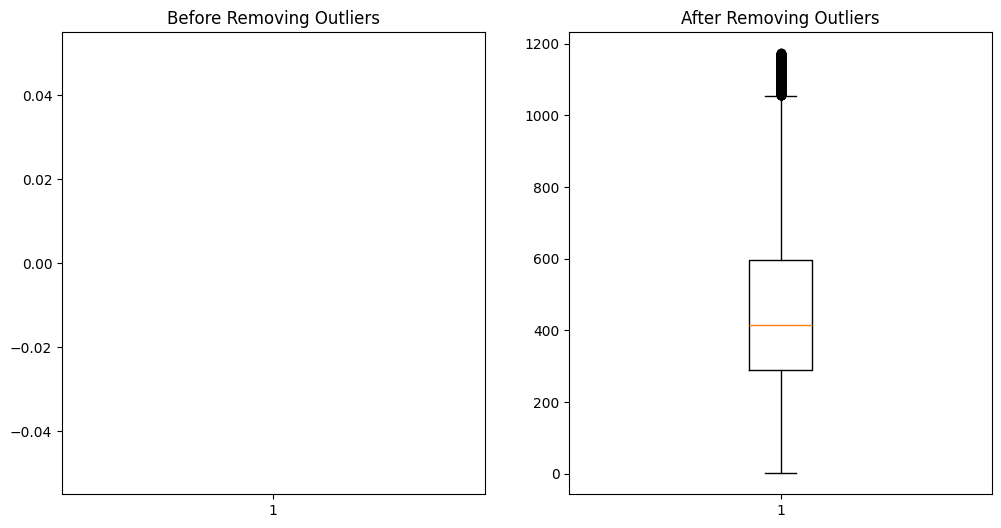

Data after removing outliers:
    Value
0   129.0
1  1106.0
2   190.0
3   235.0
4   280.0


In [154]:
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(42)

def load_dataset(file_path):
  return pd.read_csv(file_path)

df = load_dataset("./housing.csv")

# Add extreme outliers (including very low values)
outliers = np.array([10, 120, 130, 5, 140, 3])
data_with_outliers = np.concatenate([df['total_bedrooms'].values, outliers])

# Convert to DataFrame
df = pd.DataFrame({'Value': data_with_outliers})

# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Value'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered['Value'])
ax2.set_title("After Removing Outliers")

plt.show()

print("Data after removing outliers:")
print(df_filtered.head())

## Feature Selection

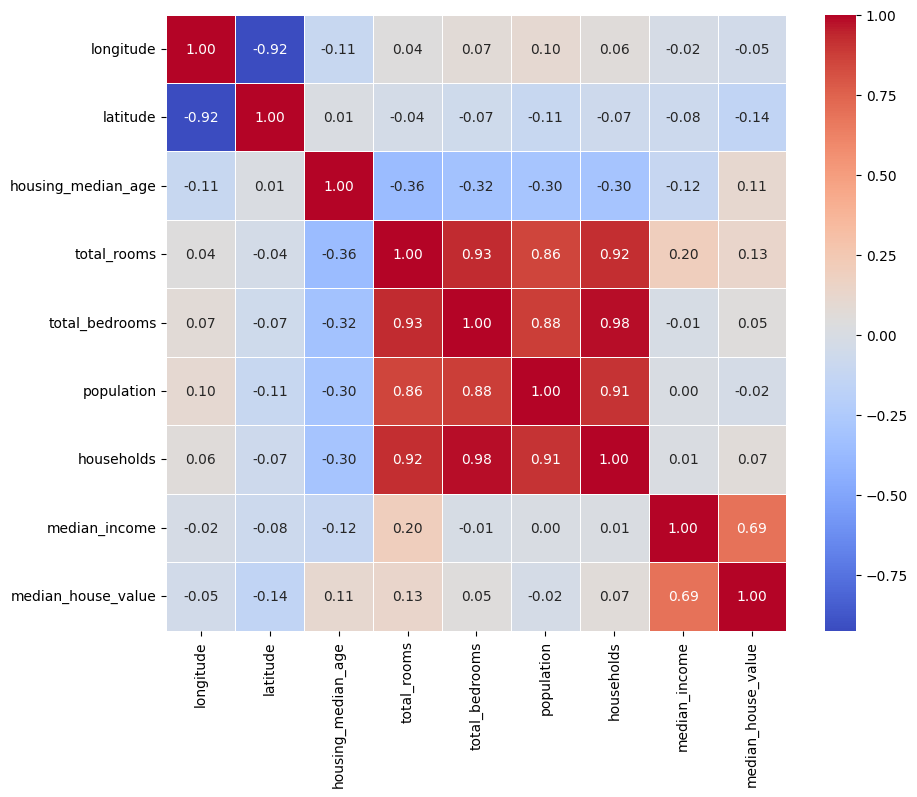

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

def load_housing_data(HOUSING_PATH):
 return pd.read_csv(HOUSING_PATH)

housing = load_housing_data("./housing.csv")
housing.head()

housing_new = housing.drop(columns=['ocean_proximity'])


# Calculate correlation matrix
corr_matrix = housing_new.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

## PCA

In [156]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./housing.csv")  # Replace with actual dataset path
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [157]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['median_house_value'], errors='ignore')  # Drop target if applicable

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

In [158]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
scaled_data = imputer.fit_transform(scaled_data)

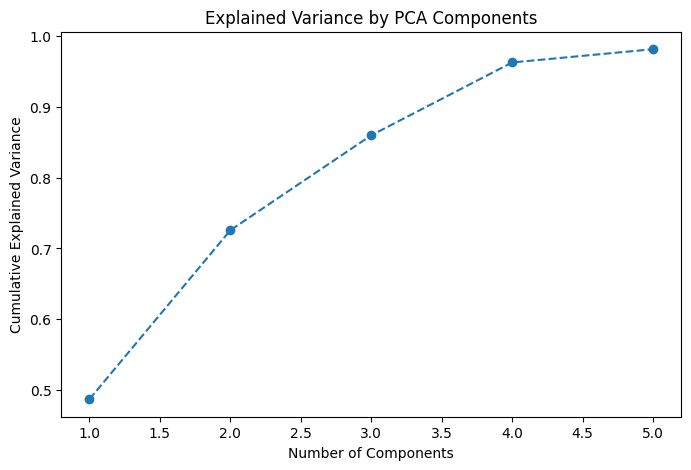

In [159]:
# manually 
from sklearn.decomposition import PCA

# Choose the number of components
pca = PCA(n_components=5)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(5)])


import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

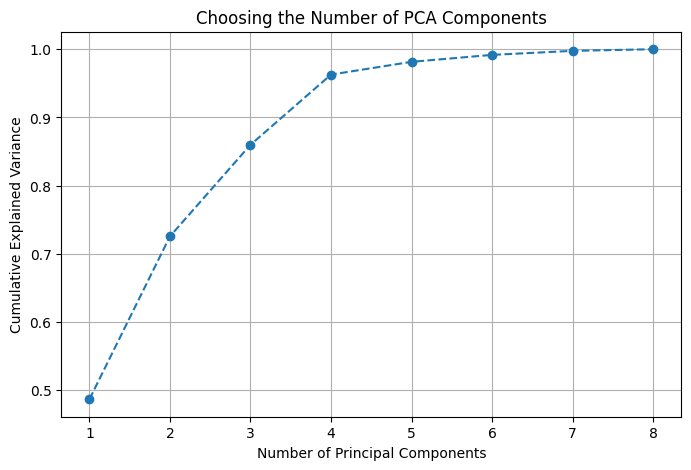

In [160]:
# automate the n component

from sklearn.decomposition import PCA
import numpy as np

# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()

In [161]:
# Find the number of components that explain at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


pca = PCA(n_components=optimal_components)
pca

Optimal number of components: 4


,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",np.int64(4)
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for rando